PANDAS
Librería de Python especializada en el manejo y análisis de estructuras de datos

In [3]:
## Librerias necesarias
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings("ignore")

pokemon = pd.read_csv('https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv')
pokemon = pokemon.drop(['#'],axis=1)


(800, 12)


In [5]:
print(pokemon.shape) # Validando la cantidad de datos
print(pokemon.info()) # Validando la estructura de los datos
print(pokemon.describe()) # Validando el comportamienton general de los datos
print(pokemon['Name'].dtype) # Validando la estructura de los datos

(800, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB
None
           Total          HP      Attack     Defense     Sp. Atk     Sp. Def  \
count  800.00000  800.000000  800.000000  800.000000  800.000000  800.000000   
mean   435.10250   69.258750   79.001250   73.842500   72.820000   71.902500   
std    119.96304   2

--------------------------------------------------------------------- LIMPIEZA DE DATOS
* Se exploraran los datos faltantes de la base de datos de manera ordenada

In [10]:
print(pokemon.isnull().sum().sort_values(ascending=False)) # cantidad de datos faltantes
pokemon.isnull().sum().sort_values(ascending=False).plot(kind='bar') # Visualización de datos faltantes
print((pokemon.isnull().mean()*100).sort_values(ascending=False)) # cantidad de datos faltantes a nivel %')


Type 2        48.25
Name           0.00
Type 1         0.00
Total          0.00
HP             0.00
Attack         0.00
Defense        0.00
Sp. Atk        0.00
Sp. Def        0.00
Speed          0.00
Generation     0.00
Legendary      0.00
dtype: float64


--------------------------------------------------------------------- USANDO VBLES

In [12]:
# Concatenando variables
type_of_combined = pokemon['Type 1'].str.cat(pokemon['Type 2'],sep='-',na_rep='nan')
type_of_combined
# Creando una nueva variable
pokemon['Type_of_conc'] = type_of_combined
pokemon.head(3)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type_of_conc
0,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Grass-Poison
1,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Grass-Poison
2,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Grass-Poison


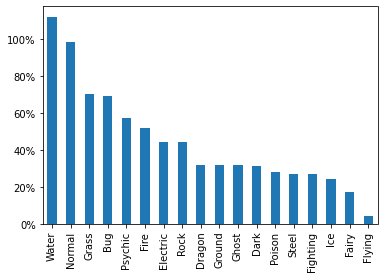

In [17]:
# muestra la cantidad de registros segun la columna Type 1
pokemon['Type 1'].value_counts(ascending=False)
pokemon['Type 1'].value_counts(ascending=False).plot(kind='bar') # muestra el resultado en forma de grafica de barra
(pokemon['Type 1'].value_counts(ascending=False, normalize=True)*100).plot(kind='bar').yaxis.set_major_formatter(mtick.PercentFormatter())

<AxesSubplot:xlabel='Type 1', ylabel='Attack'>

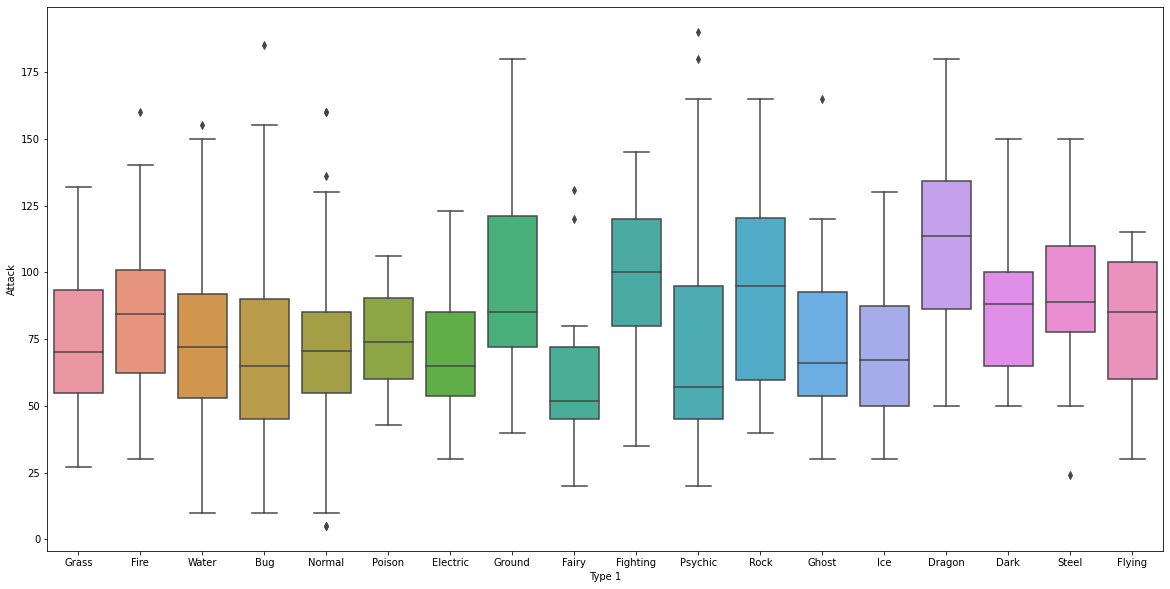

In [18]:
## Entendiendo las diferencias puntuales por grupos
import seaborn as sns
plt.figure(figsize=(20,10))
sns.boxplot(x = "Type 1", y = "Attack",
            data = pokemon) 

Text(0, 0.5, 'Type of Pokemon')

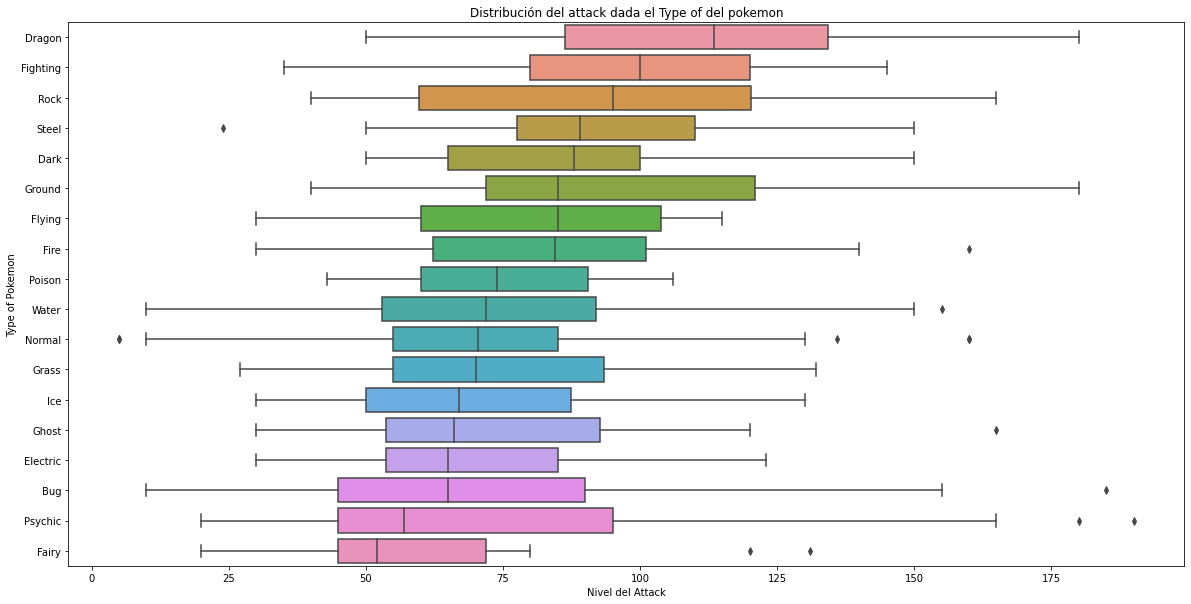

In [19]:
## OTRA FORMA
plt.figure(figsize=(20,10))
my_order = pokemon.groupby(['Type 1'])['Attack'].median().iloc[::-1].sort_values(ascending=False).index
sns.boxplot(y = "Type 1", 
            x = "Attack",
            data = pokemon, order=my_order) 
plt.title('Distribución del attack dada el Type of del pokemon')
plt.xlabel('Nivel del Attack')
plt.ylabel('Type of Pokemon')

<Figure size 1440x720 with 0 Axes>

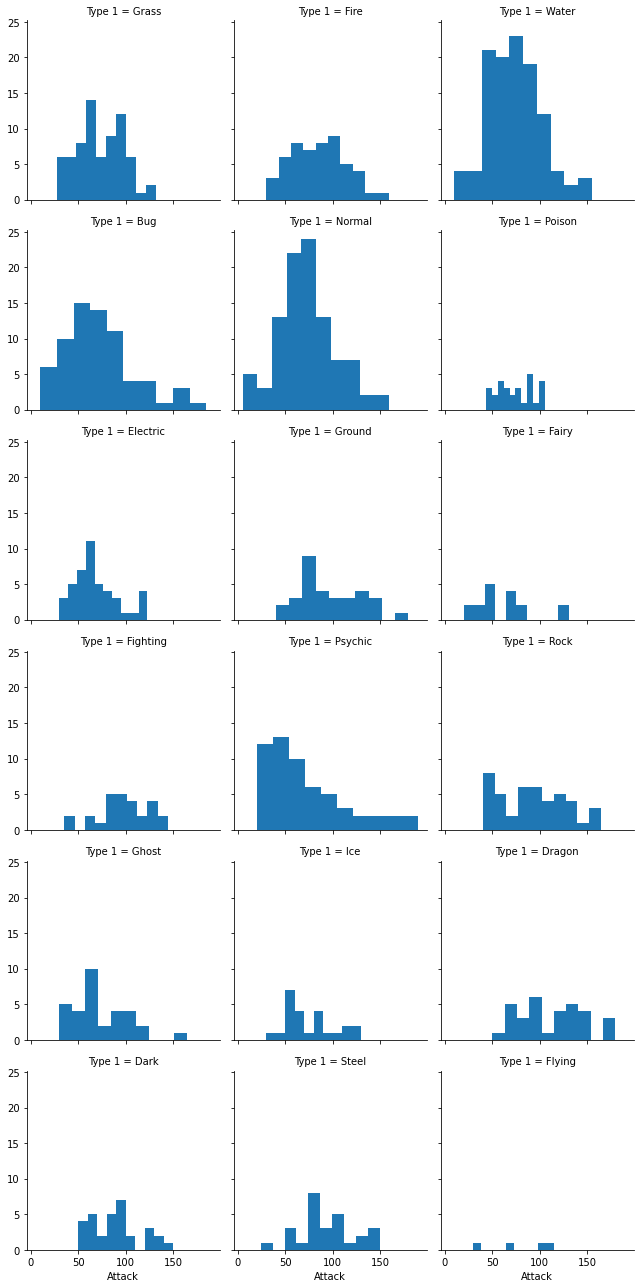

In [23]:
plt.figure(figsize=(20,10))
g = sns.FacetGrid(pokemon, col='Type 1', col_wrap=3,sharex=True,sharey=True)
g.map(plt.hist,'Attack')

In [25]:
pokemon.groupby(['Type 1'])['Type 2'].value_counts() # GROUP BY
pd.crosstab(pokemon['Type 1'],pokemon['Generation']) ## Tablas cruzadas

Generation,1,2,3,4,5,6
Type 1,,,,,,
Bug,14,12,12,10,18,3
Dark,0,6,6,3,13,3
Dragon,3,0,12,4,9,4
Electric,9,7,5,12,8,3
Fairy,2,5,0,1,0,9
Fighting,7,2,5,3,7,3
Fire,14,8,8,5,9,8
Flying,0,0,0,0,2,2
Ghost,4,1,5,7,5,10


In [28]:
import numpy as np
def outlier_check(data):

   
    M = max(data)
    m, s = np.mean(data), np.std(data)
    
   
    L, H = m-2*s, m+2*s
    
    
    f, ax = plt.subplots()
    f.set_figheight(5)
    f.set_figwidth(5)
    ax.set_ylim([0,0.025])
    ax.set_xlim([0,M])
    ax.set_title('"{}" outlier detection'.format(data.name))
    
    
    ax.vlines(H, 0, 0.025, color='red', linestyle='dashed')
    ax.fill_between(x=[H,M], y1=0.025, color='red', alpha=.05)
    
    
    ax.vlines(L, 0, 0.025, color='red', linestyle='dashed')
    ax.fill_between(x=[0,L], y1=0.025, color='red', alpha=.05)
    
    
    sns.distplot(data, ax=ax)
    
    
    return data[(data<L) | (data>H)].index

----------------------------------------------------- BUSQUEDA DE VALORES ANOMALOS

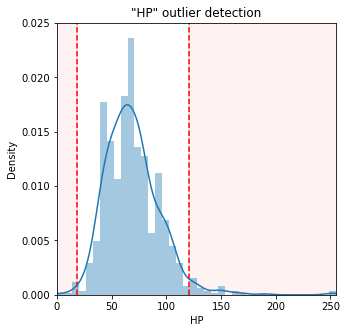

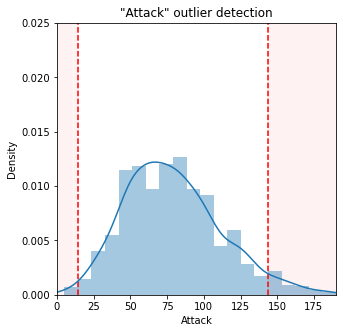

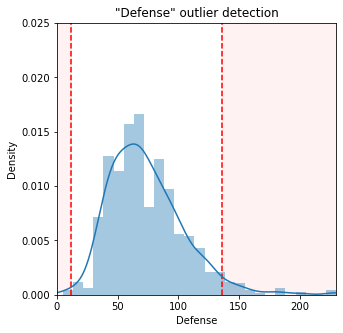

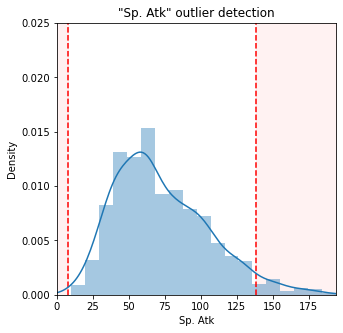

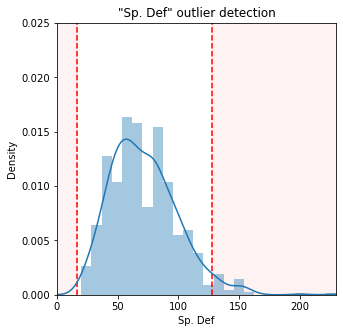

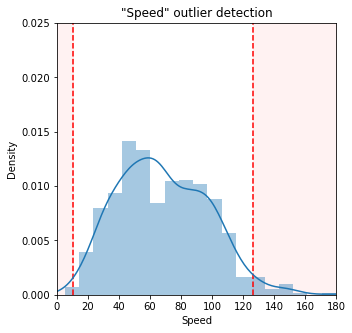

In [29]:
stats = pokemon.columns[4:-3]
pokemon['Outlier'] = np.zeros((len(pokemon),1))
for var in stats:
    pokemon.loc[outlier_check(pokemon[var]),'Outlier'] = 1